# 7. PRIPREMA PODATAKA ZA MAŠINSKO UČENJE

(by Gjorgji Noveski, JSI, Slovenia and Marija Markovska Dimitrovska, FEEIT, CMUS, Macedonia)

Priprema podataka za mašinsko učenje je proces pripreme sirovih podataka kako bi bili pogodni za algoritme mašinskog učenja. Cilj pripreme podataka je osigurati tačnost, potpunost i doslednost podataka, te da su u formatu koji algoritmi mogu efikasno koristiti. Pravilnom pripremom podataka možete poboljšati tačnost i efikasnost modela, što vodi do boljih uvida i predviđanja.

Neki ključni koraci uključeni u pripremu podataka za mašinsko učenje su:

- **Prikupljanje podataka**: Ovo je prvi korak u procesu pripreme podataka. Podaci se mogu prikupljati iz različitih izvora, kao što su baze podataka, API-ji, web scraping i ankete;
- **Čišćenje podataka**: U ovom koraku uklanjate nevažne ili duplikate podataka, ispravljate greške i popunjavate nedostajuće vrednosti;
- **Označavanje podataka**: Takođe poznato kao anotacija podataka, ovde se dodaju ciljni atributi podacima i označavaju se kako bi model mašinskog učenja mogao naučiti kakva predviđanja se očekuju od njega.
- **Ekstrakcija karakteristika:** Ovaj korak uključuje odabir i izdvajanje relevantnih karakteristika iz podataka koje će verovatno uticati na performanse modela;
- **Podela podataka**: Nakon što su podaci pripremljeni, oni se dele na trening, validacione i test setove;
- **Proširenje podataka**: Ovaj korak uključuje stvaranje dodatnih podataka dodavanjem šuma, rotiranjem ili preokretanjem postojećih podataka, kako bi se povećala veličina trening seta i poboljšala robusnost modela.

U ovom poglavlju biće razmotreni svi navedeni ključni koraci. Da biste počeli, morate uvesti neke pakete koji će vam pomoći u pripremi podataka. Ovi paketi, odnosno biblioteke, su:

- **pandas** za rad sa tabelarnim podacima;
- **numpy** za matematičke operacije;
- **sklearn** za algoritme mašinskog učenja i druge korisne funkcije;
- **matplotlib** za prikazivanje grafikona i dijagrama;
- **skimage** za obradu slika.

In [14]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split
from sklearn import svm
from skimage import io 
from skimage import transform
from skimage.transform import rotate, AffineTransform
from skimage.util import random_noise
from skimage.filters import gaussian
from skimage import util

## 7.1. Prikupljanje podataka

Ovde će se koristiti mali skup podataka. Prikupljen je iz ankete sprovedene u dve različite srednje škole. U ovom skupu podataka postoje informacija o svakom učeniku, kao što su: njegovo/ njeno ime, starost, pol, visina u centimetrima, srednja škola koju pohađaju i prosečna ocena (1 je najniža, 5 je najviša).

Prvi korak je učitavanje skupa podataka. Trebali biste ga odštampati da biste videli s čime radite. Ako je skup podataka velik, možete odštampati samo gornji deo skupa podataka pomoću komande **dataset.head()**.

In [95]:
dataset = pd.read_csv('https://raw.githubusercontent.com/VALENCEML/eBOOK/main/EN/07/sample_dataset.txt')
dataset

,Full name,age,sex,height,school,average grade
0,Roberta Guzman,14.0,f,150.00,High school Charles,3.5
1,Christina Griffith,14.0,f,166.00,High school Charles,3.3
2,Harvey Aguilar,35.0,m,152.00,High school Charles,2.0
3,Vicky Mack,18.0,f,158.00,High school Charles,2.5
4,Kelley Freeman,18.0,f,167.00,High school Charles,4.5
5,Robin Horton,17.0,f,160.00,High school Charles,4.0
6,Margie Steele,15.0,f,NaN,High school Charles,3.0
7,Verna Holland,17.0,f,170.00,High school Charles,3.1
8,Lenny Parker,17.0,m,182.00,High school Charles,10.1
9,Marvin Massey,16.0,m,172.00,High school Charles,3.7


Ako pogledate odštampane podatke, možete primetiti da:

- Skup podataka sadrži prazne ćelije: "height" (visina) u redu 6, "age" (starost) u redu 24 i "school" (škola) u redu 28;
- Skup podataka sadrži pogrešne podatke: "age" (starost) u redu 2 (ova starost nije logična za srednjoškolca), "average grade" (prosečna ocena) u redu 8 i redu 25 (prosečna ocena treba da bude između 1 i 5) i "height" (visina) u redu 18 i redu 25 (visina treba da bude u centimetrima, a ne u metrima).
- Skup podataka sadrži duplikate: red 10 i red 11, te red 20 i red 21;

Stoga, pre nego što izvršite neku analizu na skupu podataka, podaci treba da se očiste.

## 7.2. Čišćenje podataka

### 7.2.1. Prazne ćelije

Prazne ćelije mogu potencijalno dati pogrešne rezultate prilikom analize podataka. Postoji nekoliko načina kako se možete nositi s praznim ćelijama.

#### 7.2.1.1. Uklanjanje redova

Uklanjanje redova koji sadrže prazne ćelije obično je u redu, jer skupovi podataka mogu biti vrlo veliki, pa to neće imati velikog uticaja na rezultat.

In [96]:
dataset1=dataset.dropna()
dataset1

,Full name,age,sex,height,school,average grade
0,Roberta Guzman,14.0,f,150.00,High school Charles,3.5
1,Christina Griffith,14.0,f,166.00,High school Charles,3.3
2,Harvey Aguilar,35.0,m,152.00,High school Charles,2.0
3,Vicky Mack,18.0,f,158.00,High school Charles,2.5
4,Kelley Freeman,18.0,f,167.00,High school Charles,4.5
5,Robin Horton,17.0,f,160.00,High school Charles,4.0
7,Verna Holland,17.0,f,170.00,High school Charles,3.1
8,Lenny Parker,17.0,m,182.00,High school Charles,10.1
9,Marvin Massey,16.0,m,172.00,High school Charles,3.7
10,Glenn Greer,18.0,m,180.00,High school Charles,2.9


#### 7.2.1.2. Zamena praznih ćelija

Drugi način za rešavanje praznih ćelija je umetanje nove vrednosti umesto uklanjanja celog reda.

Na primer, možete zameniti prazne vrednosti za jednu kolonu. Ako želite promeniti originalni DataFrame, koristite argument **inplace = True**:

In [97]:
dataset = pd.read_csv('sample_dataset1.txt')
dataset['height'].fillna(175, inplace=True)
dataset

,Full name,age,sex,height,school,average grade
0,Roberta Guzman,14.0,f,150.00,High school Charles,3.5
1,Christina Griffith,14.0,f,166.00,High school Charles,3.3
2,Harvey Aguilar,35.0,m,152.00,High school Charles,2.0
3,Vicky Mack,18.0,f,158.00,High school Charles,2.5
4,Kelley Freeman,18.0,f,167.00,High school Charles,4.5
5,Robin Horton,17.0,f,160.00,High school Charles,4.0
6,Margie Steele,15.0,f,175.00,High school Charles,3.0
7,Verna Holland,17.0,f,170.00,High school Charles,3.1
8,Lenny Parker,17.0,m,182.00,High school Charles,10.1
9,Marvin Massey,16.0,m,172.00,High school Charles,3.7


Čest način zamene praznih ćelija je izračunavanje srednje vrednosti, medijane ili modusa kolone. Na primer, zamenimo prazne ćelije u koloni "age" (starost) sa modusom (vrednošću koja se najčešće pojavljuje).

In [98]:
a=dataset["age"].mode()[0]
dataset["age"].fillna(a,inplace=True)
dataset

,Full name,age,sex,height,school,average grade
0,Roberta Guzman,14.0,f,150.00,High school Charles,3.5
1,Christina Griffith,14.0,f,166.00,High school Charles,3.3
2,Harvey Aguilar,35.0,m,152.00,High school Charles,2.0
3,Vicky Mack,18.0,f,158.00,High school Charles,2.5
4,Kelley Freeman,18.0,f,167.00,High school Charles,4.5
5,Robin Horton,17.0,f,160.00,High school Charles,4.0
6,Margie Steele,15.0,f,175.00,High school Charles,3.0
7,Verna Holland,17.0,f,170.00,High school Charles,3.1
8,Lenny Parker,17.0,m,182.00,High school Charles,10.1
9,Marvin Massey,16.0,m,172.00,High school Charles,3.7


### 7.2.2. Pogrešni podaci

Ponekad možete primetiti pogrešne podatke gledajući u skup podataka, jer imate očekivanje kako bi trebalo da izgledaju. Na primer, neki učenici su uneli svoju visinu u metrima umesto u centimetrima. Možete ispraviti ove pogrešne vrednosti zamenjujući ih tačnima (165 umesto 1,65 i 161 umesto 1,61). Ako je skup podataka mali (kao ovaj), možete zameniti ove vrednosti jednu po jednu. Za veće skupove podataka možete kreirati neka pravila, npr. postaviti neke granice za legalne vrednosti i zameniti vrednosti koje su izvan granica. Probajmo ovu drugu opciju. Možete kreirati pravilo: "ako je visina manja od 3 (što znači da je uneta u metrima), onda je pomnožite sa 100 da biste je pretvorili u centimetre".

Prvu opciju (zamena vrednosti jednu po jednu) možete pokušati sami.

In [99]:
for x in dataset.index:
    if dataset.loc[x, "height"]<3:
        dataset.loc[x,"height"]=dataset.loc[x,"height"]*100
dataset

,Full name,age,sex,height,school,average grade
0,Roberta Guzman,14.0,f,150.0,High school Charles,3.5
1,Christina Griffith,14.0,f,166.0,High school Charles,3.3
2,Harvey Aguilar,35.0,m,152.0,High school Charles,2.0
3,Vicky Mack,18.0,f,158.0,High school Charles,2.5
4,Kelley Freeman,18.0,f,167.0,High school Charles,4.5
5,Robin Horton,17.0,f,160.0,High school Charles,4.0
6,Margie Steele,15.0,f,175.0,High school Charles,3.0
7,Verna Holland,17.0,f,170.0,High school Charles,3.1
8,Lenny Parker,17.0,m,182.0,High school Charles,10.1
9,Marvin Massey,16.0,m,172.0,High school Charles,3.7


Drugi primer je starost učenika. Starost srednjoškolaca treba da bude manja ili jednaka od 18 godina. Stoga, 35 godina je očigledno pogrešan podatak. Red koji sadrži ovu starost treba ukloniti.

In [100]:
for x in dataset.index:
    if dataset.loc[x, "age"] > 18:
        dataset.drop(x, inplace = True)
dataset

,Full name,age,sex,height,school,average grade
0,Roberta Guzman,14.0,f,150.0,High school Charles,3.5
1,Christina Griffith,14.0,f,166.0,High school Charles,3.3
3,Vicky Mack,18.0,f,158.0,High school Charles,2.5
4,Kelley Freeman,18.0,f,167.0,High school Charles,4.5
5,Robin Horton,17.0,f,160.0,High school Charles,4.0
6,Margie Steele,15.0,f,175.0,High school Charles,3.0
7,Verna Holland,17.0,f,170.0,High school Charles,3.1
8,Lenny Parker,17.0,m,182.0,High school Charles,10.1
9,Marvin Massey,16.0,m,172.0,High school Charles,3.7
10,Glenn Greer,18.0,m,180.0,High school Charles,2.9


Redovi sa prosečnom ocenom većom od 5 takođe treba da budu uklonjeni.

In [101]:
for x in dataset.index:
    if dataset.loc[x, "average grade"] > 5:
        dataset.drop(x, inplace = True)
dataset

,Full name,age,sex,height,school,average grade
0,Roberta Guzman,14.0,f,150.0,High school Charles,3.5
1,Christina Griffith,14.0,f,166.0,High school Charles,3.3
3,Vicky Mack,18.0,f,158.0,High school Charles,2.5
4,Kelley Freeman,18.0,f,167.0,High school Charles,4.5
5,Robin Horton,17.0,f,160.0,High school Charles,4.0
6,Margie Steele,15.0,f,175.0,High school Charles,3.0
7,Verna Holland,17.0,f,170.0,High school Charles,3.1
9,Marvin Massey,16.0,m,172.0,High school Charles,3.7
10,Glenn Greer,18.0,m,180.0,High school Charles,2.9
11,Glenn Greer,18.0,m,180.0,High school Charles,2.9


### 7.2.3. Duplikati

Da biste otkrili duplikate u skupu podataka, možete koristiti metodu **duplicated()**. Ova metoda vraća Boolean vrednost za svaki red: **True** za svaki red koji je duplikat, inače **False**.

In [102]:
print(dataset.duplicated())

0     False
1     False
3     False
4     False
5     False
6     False
7     False
9     False
10    False
11     True
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21     True
22    False
23    False
24    False
26    False
27    False
28    False
29    False
30    False
dtype: bool


Da biste uklonili duplikate, možete koristiti metodu **drop_duplicates()**.

In [103]:
dataset.drop_duplicates(inplace=True)
dataset

,Full name,age,sex,height,school,average grade
0,Roberta Guzman,14.0,f,150.0,High school Charles,3.5
1,Christina Griffith,14.0,f,166.0,High school Charles,3.3
3,Vicky Mack,18.0,f,158.0,High school Charles,2.5
4,Kelley Freeman,18.0,f,167.0,High school Charles,4.5
5,Robin Horton,17.0,f,160.0,High school Charles,4.0
6,Margie Steele,15.0,f,175.0,High school Charles,3.0
7,Verna Holland,17.0,f,170.0,High school Charles,3.1
9,Marvin Massey,16.0,m,172.0,High school Charles,3.7
10,Glenn Greer,18.0,m,180.0,High school Charles,2.9
12,Fannie Ortiz,15.0,f,164.0,High school Charles,2.8


Sada možete izvršiti neke analize na očišćenom skupu podataka.

Koja je prosečna visina anketiranih učenika?

In [104]:
x=dataset["height"].mean()
formated_x="{:.2f}".format(x)
print(f"The average height of the surveyed students is {formated_x} centimeters.")

The average height of the surveyed students is 169.27 centimeters.


Koja je prosečna ocena anketiranih učenika?

In [105]:
x=dataset["average grade"].mean()
formated_x="{:.2f}".format(x)
print(f"The average grade of the surveyed students is {formated_x}.")

The average grade of the surveyed students is 4.02.


Sada pogledajmo koliko različitih srednjih škola se pominje u skupu podataka.

In [106]:
nm_of_schools = len(dataset['school'].unique())
print(f"We have {nm_of_schools} schools present in the dataset, which are:")
for school in dataset['school'].unique():
    print(school)

We have 2 schools present in the dataset, which are:
High school Charles
High school Wimble


## 7.2. Označavanje podataka

Recimo, na primer, da ste profesor i želite dobiti još više informacija iz ovog skupa podataka. U tom slučaju, jedan pristup bi bio dodavanje informacija o tome da li će učenik proći ili ne prema njihovoj prosečnoj oceni. Možete ručno dodati još jednu kolonu u skup podataka koja će se zvati "Has passed" (Prošao je) i sadržaće vrednosti da ili ne, predstavljene jedinicama i nulama.

In [107]:
dataset['has passed'] = np.empty(len(dataset), dtype=str)
dataset['has passed'] = np.where(dataset['average grade'] >= 3.5, 1, 0)
dataset

,Full name,age,sex,height,school,average grade,has passed
0,Roberta Guzman,14.0,f,150.0,High school Charles,3.5,1
1,Christina Griffith,14.0,f,166.0,High school Charles,3.3,0
3,Vicky Mack,18.0,f,158.0,High school Charles,2.5,0
4,Kelley Freeman,18.0,f,167.0,High school Charles,4.5,1
5,Robin Horton,17.0,f,160.0,High school Charles,4.0,1
6,Margie Steele,15.0,f,175.0,High school Charles,3.0,0
7,Verna Holland,17.0,f,170.0,High school Charles,3.1,0
9,Marvin Massey,16.0,m,172.0,High school Charles,3.7,1
10,Glenn Greer,18.0,m,180.0,High school Charles,2.9,0
12,Fannie Ortiz,15.0,f,164.0,High school Charles,2.8,0


Možete videti da skup podataka sadrži dodatnu kolonu pod nazivom "has passed" (prošao je). U budućnosti možete dodavati dodatne kolone, zavisno o tome šta se od vas traži.

## 7.3. Izdvajanje osobina

Izdvajanje osobina je zadatak pretvaranja osobina koje već imate u skupu podataka u osobine koje će biti pogodne za upotrebu u algoritmima mašinskog učenja. Pošto su algoritmi dizajnirani da bolje rukuju podacima koji su u numeričkom formatu, sledeći korak u izdvajanju osobina biće upravo to, da se podaci pretvore u nešto numeričko.

Prvo, trebali biste organizovati skup podataka u Python rečnik. Možete to uraditi, pošto metod koji će pretvoriti osobine u numeričke osobine prihvata rečnike.

In [108]:
dataset_as_dictionary = []
for index, row in dataset.iterrows():
    row_dict = {}
    row_dict['Full name'] = row['Full name']
    row_dict['age'] = row['age']
    row_dict['sex'] = row['sex']
    row_dict['height'] = row['height']
    row_dict['school'] = row['school']
    row_dict['average grade'] = row['average grade']
    row_dict['has passed'] = row['has passed']
    dataset_as_dictionary.append(row_dict)

Koristite **DictVectorizer** klasu iz sklearn biblioteke kako biste postigli cilj dobijanja numeričkih osobina. Napravite instancu te klase i pozovite **fit_transform()** metodu koja će analizirati podatke i konvertovati ih u brojeve.

In [75]:
vect = DictVectorizer()
vect.fit_transform(dataset_as_dictionary).toarray()

array([[  0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,
          0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,
          0. ,   1. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,  14. ,
          3.5,   1. , 150. ,   1. ,   0. ,   1. ,   0. ],
       [  0. ,   1. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,
          0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,
          0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,  14. ,
          3.3,   0. , 166. ,   1. ,   0. ,   1. ,   0. ],
       [  0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,
          0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,
          0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   1. ,   0. ,  18. ,
          2.5,   0. , 158. ,   1. ,   0. ,   1. ,   0. ],
       [  0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,
          0. ,   0. ,   0. ,   0. ,   1. ,   0. ,   0. ,   0. ,   0. ,
          0. ,   0. ,   0. ,   0. ,   0. ,   

Možete videti da umesto osobina u tekstualnoj reprezentaciji, sada su one transformisane u numeričku reprezentaciju.

## 7.4. Podela podataka

Važan korak pri izradi modela mašinskog učenja je podela podataka na skup za obučavanje i skup za testiranje.
Morate to uraditi zato što, ako trenirate i testirate model mašinskog učenja na istom skupu podataka, rezultati vam neće reći koliko dobro će vaš model raditi kada se susretne sa novim i neviđenim podacima. Dakle, rešenje je podeliti skup podataka na skup za obučavanje i skup za testiranje. Kao što ime sugeriše, jedan će se koristiti samo u delu obučavanja modela, dok ćete dobiti metrike i praviti pretpostavke o modelu kada ga pokrenete na skupu podataka za testiranje.

Za ovaj mali skup podataka, moguće je ručno podeliti skup podataka na skup za obučavanje i skup za testiranje. Ali, ako radite sa velikim skupovima podataka, to će postati neizvodljivo. Možete koristiti korisne funkcionalnosti koje nudi sklearn biblioteka, konkretno funkciju **train_test_split()** za automatsku podelu skupa podataka. Pošto modeli mašinskog učenja uzimaju podatke kao ulaz i predviđaju neku ciljnu promenljivu, morate proslediti isto funkciji.

Na primer, želite da možete predvideti da li student ima prolaznu ocenu. Ulaz koji biste trebali pružiti modelu mašinskog učenja su opšti podaci o studentima, bez obzira na njihovu prosečnu ocenu.

Da biste to učinili, ponovo pretvorite podatke u rečnike koji će se koristiti za izdvajanje osobina, ali samo podatke koji su vam potrebni kao ulaz za model.

In [109]:
# FOR X
x_data_as_dictionary = []
for index, row in dataset.iterrows():
    row_dict = {}
    row_dict['Full name'] = row['Full name']
    row_dict['age'] = row['age']
    row_dict['sex'] = row['sex']
    row_dict['height'] = row['height']
    row_dict['school'] = row['school']
    
    x_data_as_dictionary.append(row_dict)
    

Što se tiče ciljne promenljive, ne morate raditi izdvajanje osobina, možemo je koristiti takvu kakva jeste. Ciljna promenljiva je kolona "has passed" (prošao) iz skupa podataka.

In [110]:
vect = DictVectorizer()
x = vect.fit_transform(x_data_as_dictionary).toarray()
y = dataset.iloc[:, -1]

Podelite skup podataka na 4 dela:

- x_train je ulaz za model tokom obučavanja;
- y_train je ciljna promenljiva koja će se koristiti tokom obučavanja modela;
- x_test je ulaz za model kada želite napraviti predikciju ili izračunati koliko dobro vaš model radi;
- y_test je ciljna promenljiva koju proveravate da vidite da li je vaš model pogodio kada pravi predikciju.

In [111]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

Create an instance of the **Support Vector Machine** model with the help of the sklearn library. In the **fit()** function pass the data it needs during training.

In [112]:
MLModel = svm.SVC()
MLModel.fit(x_train, y_train)

SVC()

Na kraju, napravite predikciju o podacima koje imate u skupu podataka za testiranje, gde svaki element predstavlja da li je student prošao ili ne.

In [113]:
MLModel.predict(x_test)

array([1, 1, 1, 1, 1, 1, 1, 1, 1])

## 7.5. Augmentacija podataka

7.5. Augmentacija podataka

Augmentacija podataka je tehnika veštačkog povećanja skupa podataka za obučavanje kreiranjem modifikovanih kopija skupa podataka pomoću postojećih podataka. Uključuje pravljenje manjih promena u skupu podataka ili generisanje novih tačaka podataka.

Najčešći slučaj upotrebe augmentacije podataka je kod slika. Neki modeli mašinskog učenja dizajnirani su da uzimaju slike kao ulaz. Slike se predstavljaju kao trodimenzionalni nizovi, jedna dimenzija je širina, druga visina, a treća boja (crvena, zelena, plava). Vrednosti širine i visine nizova predstavljaju intenzitet piksela određene boje i kreću se od 0 do 256.

U slučaju augmentacije slika, postoje transformacije pozicije kao što su:

- Horizontalno prevrtanje
- Vertikalno prevrtanje
- Zumiranje
- Rotiranje
- Sečenje (cropping)
- itd.

i transformacije boje kao što su:

- Osvetljenje
- Kontrast
- itd.

Učitajmo jednostavnu sliku i probajmo neke tehnike augmentacije.

In [4]:
image = io.imread('https://github.com/VALENCEML/eBOOK/raw/main/EN/07/flower.jpg')

(-0.5, 1279.5, 959.5, -0.5)

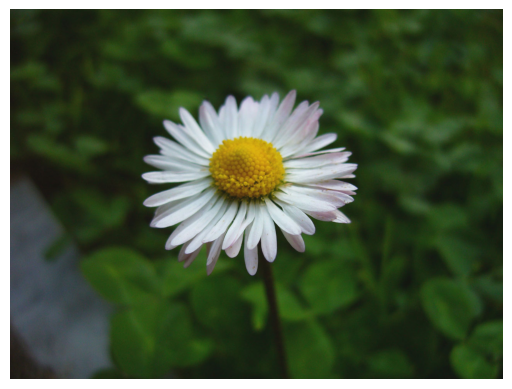

In [5]:
plt.imshow(image)
plt.axis('off')

### 7.5.1. Rotiranje

Rotate for angle of 45 degrees.

(-0.5, 1279.5, 959.5, -0.5)

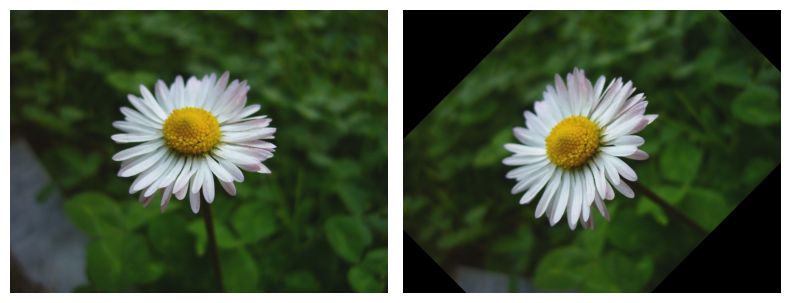

In [6]:
augmentation1=rotate(image, angle=45)
fig=plt.figure(tight_layout='auto', figsize=(8,4))
fig.add_subplot(121)
plt.imshow(image)
plt.axis('off')
fig.add_subplot(122)
plt.imshow(augmentation1)
plt.axis('off')

### 7.5.2. Vertikalno prevrtanje

(-0.5, 1279.5, 959.5, -0.5)

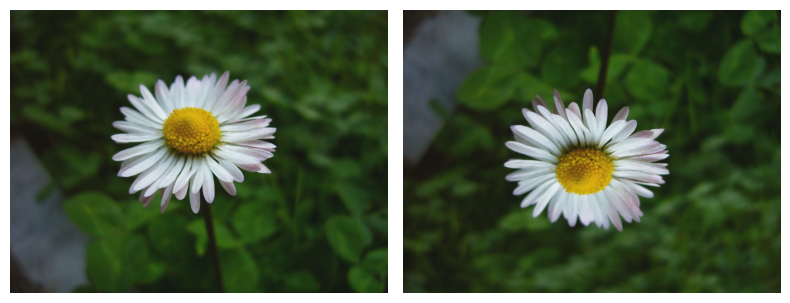

In [7]:
augmentation2=np.flipud(image)
fig=plt.figure(tight_layout='auto', figsize=(8,4))
fig.add_subplot(121)
plt.imshow(image)
plt.axis('off')
fig.add_subplot(122)
plt.imshow(augmentation2)
plt.axis('off')

### 7.5.3. Horizontalno prevrtanje

(-0.5, 1279.5, 959.5, -0.5)

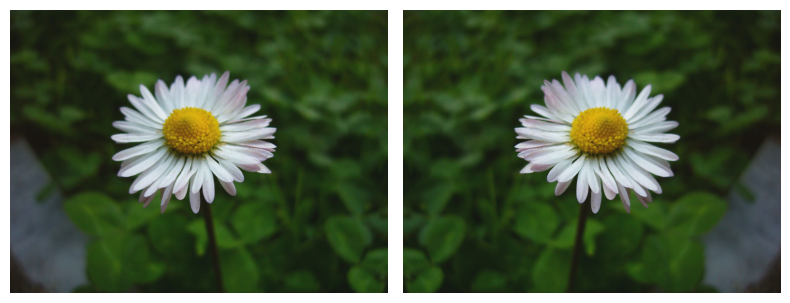

In [8]:
augmentation3=np.fliplr(image)
fig=plt.figure(tight_layout='auto', figsize=(8,4))
fig.add_subplot(121)
plt.imshow(image)
plt.axis('off')
fig.add_subplot(122)
plt.imshow(augmentation3)
plt.axis('off')

### 7.5.4. Sečenje (Cropping)

Pregledajte dimenzije slike.

In [9]:
image.shape

(960, 1280, 3)

Sečenje visine i širine slike.

(-0.5, 599.5, 399.5, -0.5)

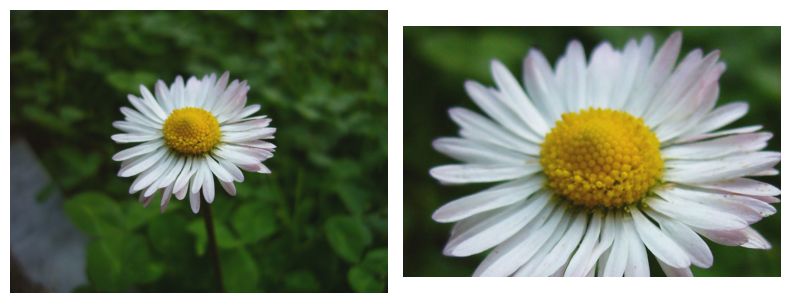

In [10]:
augmentation4=image[200:600,300:900]
fig=plt.figure(tight_layout='auto', figsize=(8,4))
fig.add_subplot(121)
plt.imshow(image)
plt.axis('off')
fig.add_subplot(122)
plt.imshow(augmentation4)
plt.axis('off')

### 7.5.5. Dodavanje slučajnog šuma

(-0.5, 1279.5, 959.5, -0.5)

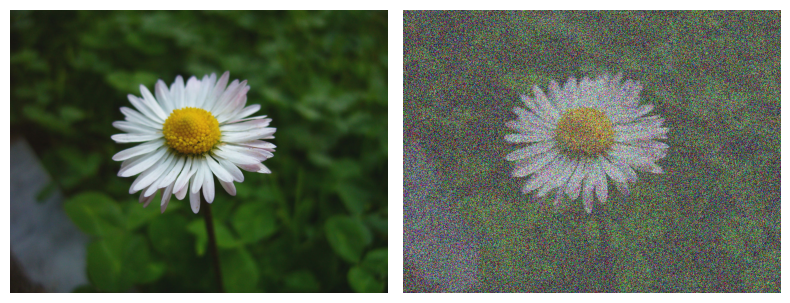

In [11]:
augmentation5=random_noise(image, var=0.1**0.1)
fig=plt.figure(tight_layout='auto', figsize=(8,4))
fig.add_subplot(121)
plt.imshow(image)
plt.axis('off')
fig.add_subplot(122)
plt.imshow(augmentation5)
plt.axis('off')

### 7.5.6. Menjanje osvetljenja

Da biste promenili osvetljenje, prvo treba normalizovati vrednosti piksela u opsegu od 0 do 1. Da biste to učinili, trebate podeliti originalne vrednosti sa 255 (jer je to maksimalna vrednost).

(-0.5, 1279.5, 959.5, -0.5)

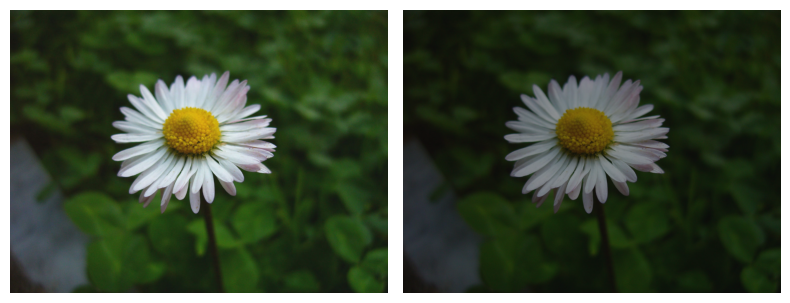

In [12]:
image1=image/255
augmentation6=image1*0.6
fig=plt.figure(tight_layout='auto', figsize=(8,4))
fig.add_subplot(121)
plt.imshow(image)
plt.axis('off')
fig.add_subplot(122)
plt.imshow(augmentation6)
plt.axis('off')

### 7.5.7. Invertovanje opsega intenziteta

Maksimalna vrednost piksela postaje minimalna (255 postaje 0), i obrnuto.

(-0.5, 1279.5, 959.5, -0.5)

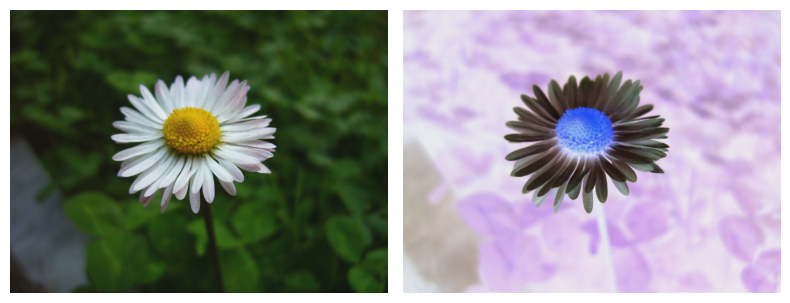

In [15]:
augmentation7=util.invert(image)
fig=plt.figure(tight_layout='auto', figsize=(8,4))
fig.add_subplot(121)
plt.imshow(image)
plt.axis('off')
fig.add_subplot(122)
plt.imshow(augmentation7)
plt.axis('off')